In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Airlines_Cleaned_File.csv')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2,1,5955


In [3]:
df.shape

(300153, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int64 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 22.9+ MB


Data is fully pre-processed so I perform next step which is 'feature encoding'.

# Feature Encoding

In [5]:
#checking unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: airline
Unique Values:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values:
['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values:
['Economy' 'Business']

Column: duration
Unique Values:
[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]

Column: days_left
Unique Values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

Column: 

All the categorical variables are nomial. So, One Hot Encoding is the right option.

In [6]:
#using get_dummies method

d1 = pd.get_dummies(df['airline'], drop_first = True,prefix='airline')

d2 = pd.get_dummies(df['source_city'], drop_first = True,prefix='source_city')

d3 = pd.get_dummies(df["departure_time"], drop_first=True,prefix='departure_time')

d4 = pd.get_dummies(df["stops"],drop_first=True,prefix='stops')

d5 = pd.get_dummies(df["arrival_time"],drop_first=True,prefix='arrival_time')

d6 = pd.get_dummies(df["destination_city"],drop_first=True,prefix='destination_city')

d7 = pd.get_dummies(df["class"],drop_first=True,prefix='class')

In [7]:
df = pd.concat([df,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [8]:
df = df.drop(columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [9]:
df.columns.tolist()

['duration',
 'days_left',
 'price',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_SpiceJet',
 'airline_Vistara',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'departure_time_Early_Morning',
 'departure_time_Evening',
 'departure_time_Late_Night',
 'departure_time_Morning',
 'departure_time_Night',
 'stops_two_or_more',
 'stops_zero',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'destination_city_Mumbai',
 'class_Economy']

In [10]:
#make a copy of encoded data
encoded_df = df.copy()

# Checking Distribution and Skewness of Data

In [11]:
#checking data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int64
 1   days_left                     300153 non-null  int64
 2   price                         300153 non-null  int64
 3   airline_Air_India             300153 non-null  uint8
 4   airline_GO_FIRST              300153 non-null  uint8
 5   airline_Indigo                300153 non-null  uint8
 6   airline_SpiceJet              300153 non-null  uint8
 7   airline_Vistara               300153 non-null  uint8
 8   source_city_Chennai           300153 non-null  uint8
 9   source_city_Delhi             300153 non-null  uint8
 10  source_city_Hyderabad         300153 non-null  uint8
 11  source_city_Kolkata           300153 non-null  uint8
 12  source_city_Mumbai            300153 non-null  uint8
 13  departure_time

Only 2 Variables needs to check distribution: 'duration', 'days_left'

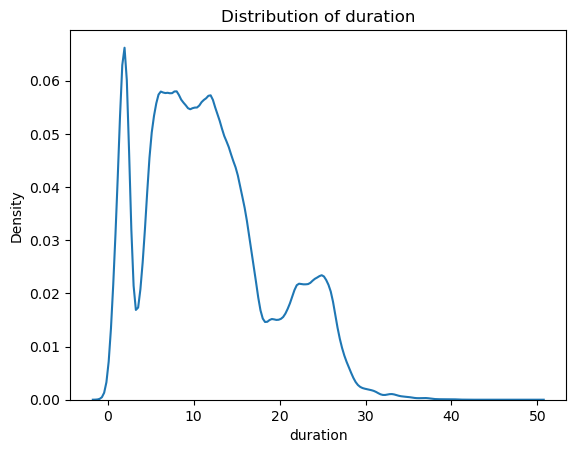

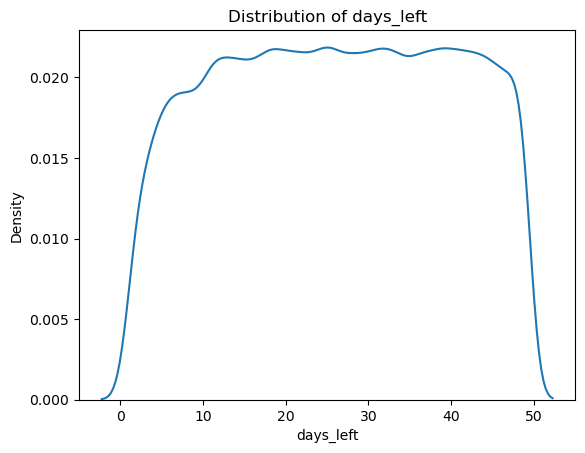

In [12]:
columns = ['duration', 'days_left']

for column in columns:
    sns.kdeplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [13]:
df['days_left'].skew()

-0.03546434955066582

In [14]:
df['duration'].skew()

0.6013368207014413

'days_left' is not skewed and 'duration' is moderate skewed. Therefore, transformation is not needed.

# Feature Scaling

In [15]:
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [16]:
print(df['duration'].unique())

[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]


In [17]:
print(df['duration'].unique())

[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]


Only 2 variables needs scaling: 'duration', 'duration'. I decide to apply min_max scaler because data has a bounded range.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [19]:
columns_to_scale = ['duration', 'days_left']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0.040816,0.0,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0.040816,0.0,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,0.040816,0.0,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,0.040816,0.0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,0.040816,0.0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [20]:
len(df.columns)

31

# Diving data into train and test set

In [21]:
x = df.drop("price",axis=1)
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape

((210107, 30), (90046, 30))

In [24]:
y_train.shape, y_test.shape

((210107,), (90046,))

# Feature Selection using Random Forest Feature Importance Method



In [25]:
from sklearn.ensemble import RandomForestRegressor  

random_forest = RandomForestRegressor(n_jobs=-1)  

random_forest.fit(X_train, y_train)

importances = random_forest.feature_importances_

feature_importance_rankings = dict(zip(X_train.columns, importances))

sorted_rankings = sorted(feature_importance_rankings.items(), key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(sorted_rankings, 1):
    print(f"{i}. {feature}: {importance}")

1. class_Economy: 0.8818722133602965
2. duration: 0.05195978495015738
3. days_left: 0.02090925959790532
4. airline_Vistara: 0.005749614881764517
5. airline_Air_India: 0.004574910723788507
6. source_city_Delhi: 0.0038220641851796047
7. destination_city_Delhi: 0.003661992265786005
8. source_city_Mumbai: 0.002514001865313731
9. destination_city_Mumbai: 0.0024471322634800844
10. source_city_Kolkata: 0.002064979181154856
11. destination_city_Hyderabad: 0.002025658953389601
12. arrival_time_Evening: 0.0019499341939764833
13. destination_city_Kolkata: 0.0018708612635746768
14. stops_two_or_more: 0.0016890018742453199
15. source_city_Hyderabad: 0.0016307797598898175
16. arrival_time_Night: 0.0015051677427817699
17. departure_time_Morning: 0.0014612440891361423
18. destination_city_Chennai: 0.0013869871962425217
19. source_city_Chennai: 0.001352265706887678
20. departure_time_Evening: 0.0013473257233924138
21. departure_time_Early_Morning: 0.0009946542170700691
22. departure_time_Night: 0.00087

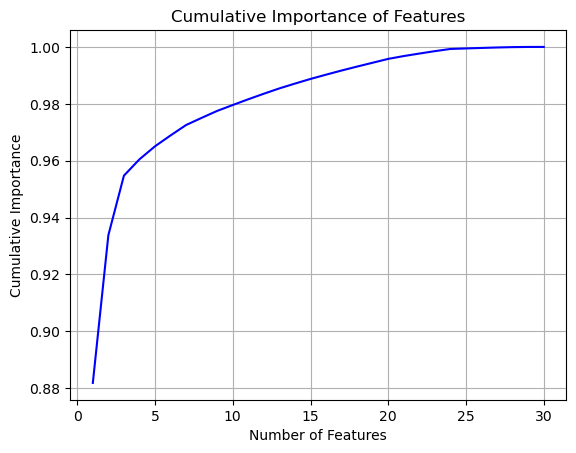

In [26]:
sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

Top 25 features are important for model building

In [27]:
# Get the feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Select the top 25 features
top_features = importance_df.head(25)['Feature'].tolist()

# Update X_train and X_test to include only the top features
X_train = X_train[top_features]
X_test = X_test[top_features]

In [28]:
#checking columns of X_train
X_train.columns.tolist()

['class_Economy',
 'duration',
 'days_left',
 'airline_Vistara',
 'airline_Air_India',
 'source_city_Delhi',
 'destination_city_Delhi',
 'source_city_Mumbai',
 'destination_city_Mumbai',
 'source_city_Kolkata',
 'destination_city_Hyderabad',
 'arrival_time_Evening',
 'destination_city_Kolkata',
 'stops_two_or_more',
 'source_city_Hyderabad',
 'arrival_time_Night',
 'departure_time_Morning',
 'destination_city_Chennai',
 'source_city_Chennai',
 'departure_time_Evening',
 'departure_time_Early_Morning',
 'departure_time_Night',
 'arrival_time_Morning',
 'arrival_time_Early_Morning',
 'airline_GO_FIRST']

### Note:- It is important to check and drop highly correlated variables after feature selection to avoid from multi-colinnearity and overfitting.

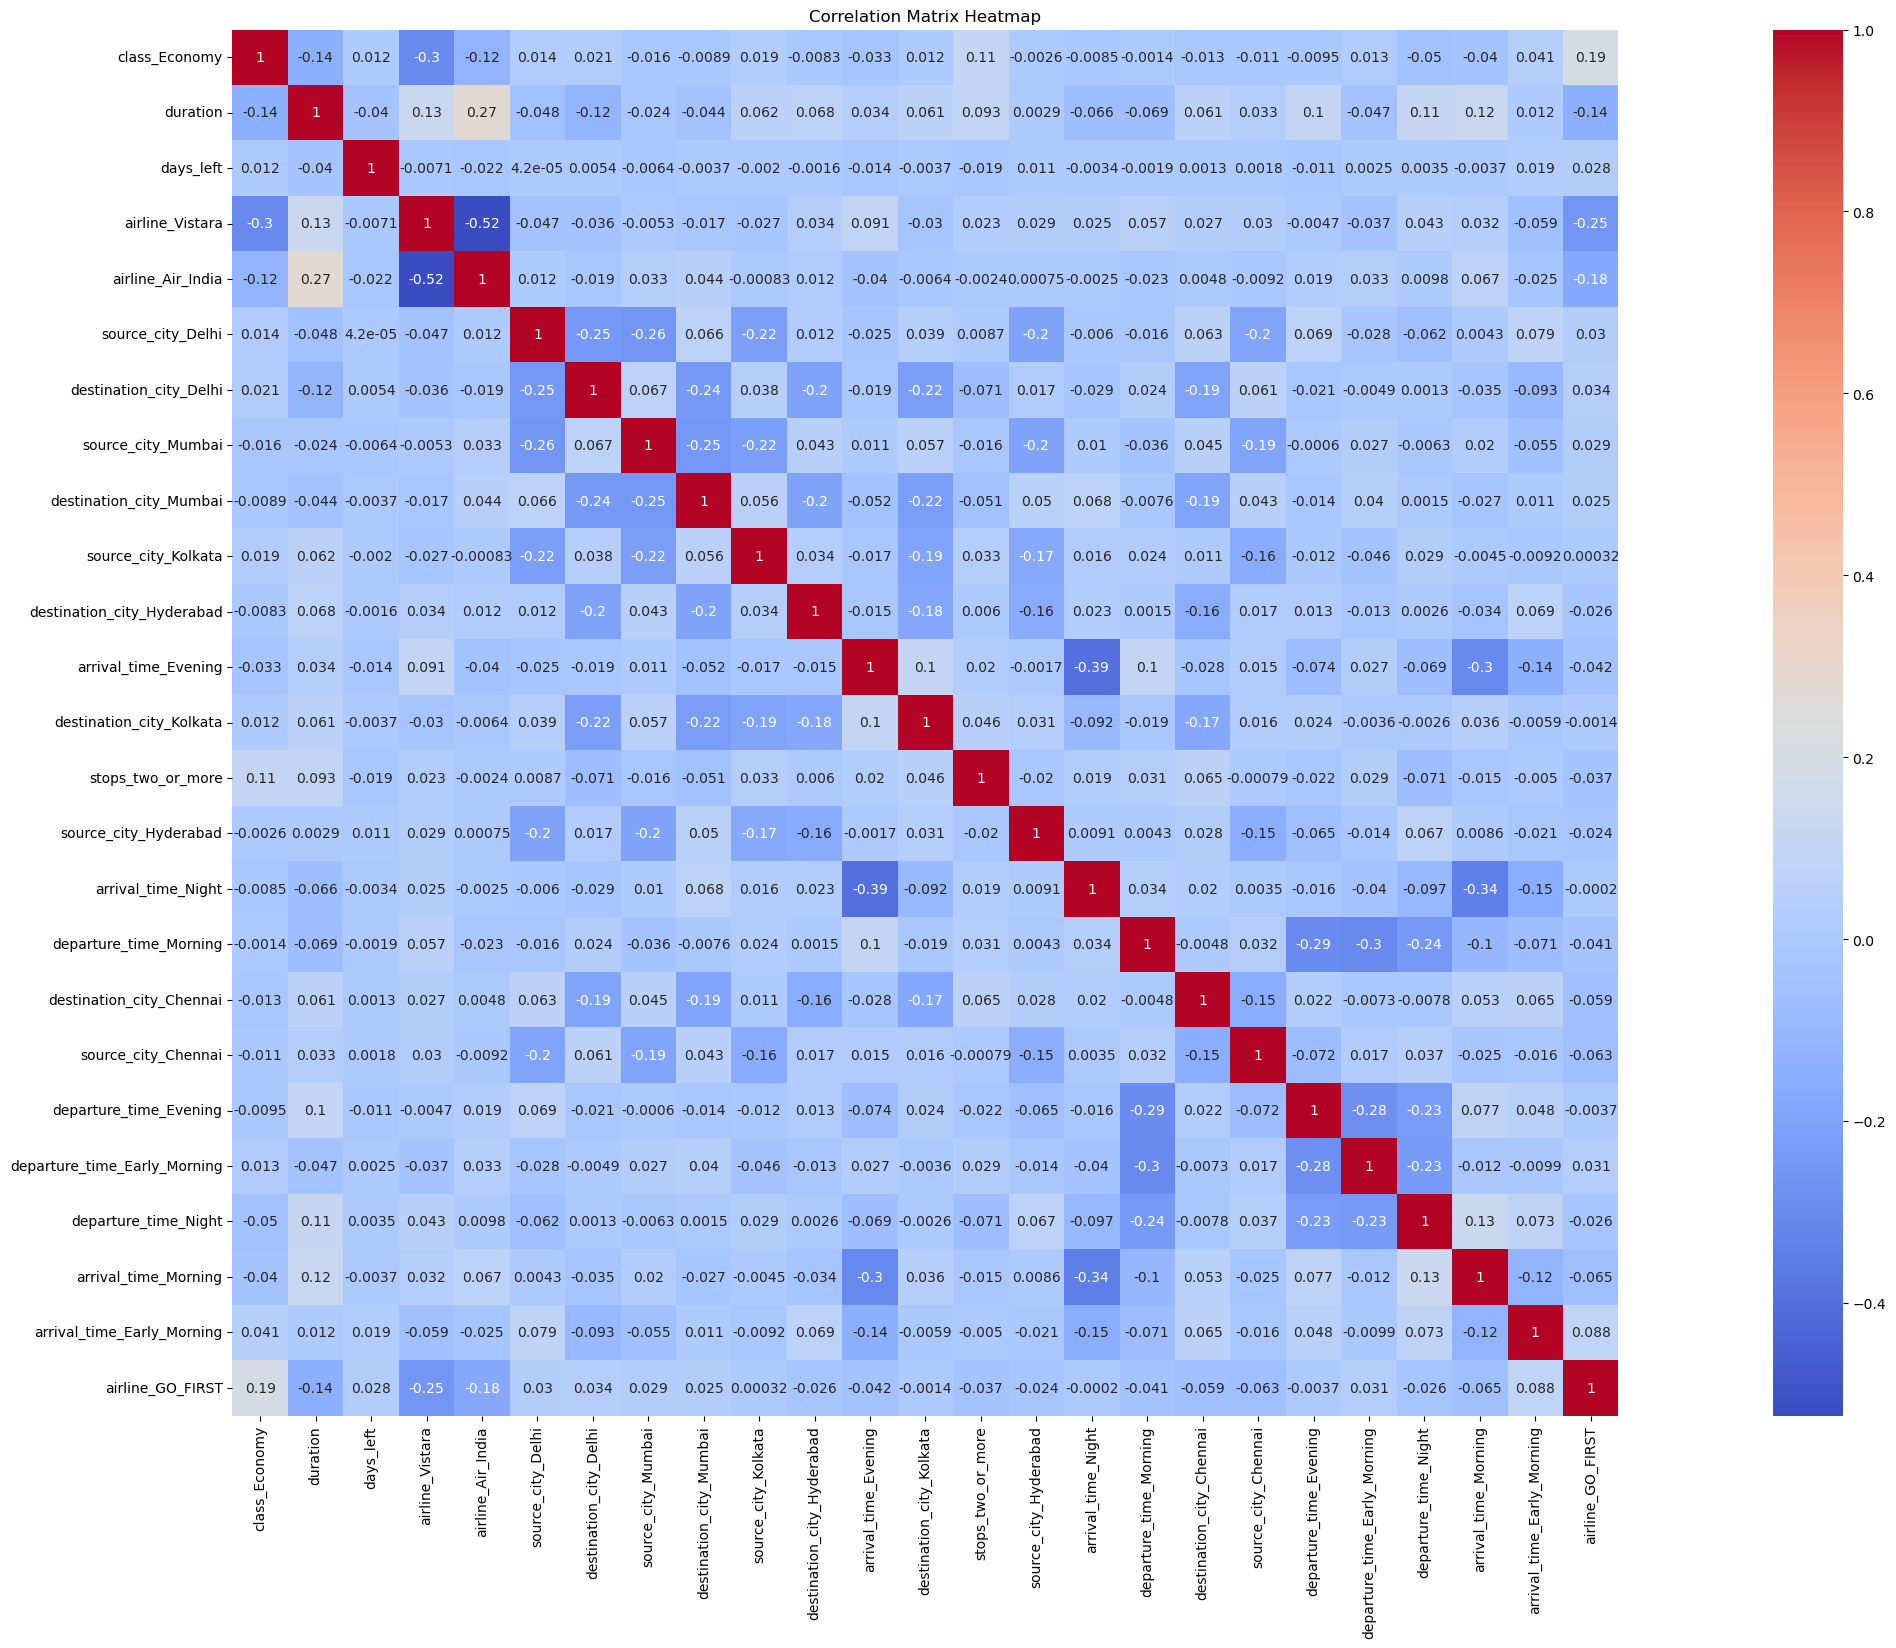

In [29]:
#checking correlation between variables

corr_matrix = X_train.corr()

plt.figure(figsize=(40,18)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

No variable is highly correlated

# Model Building

In [30]:
# import regression algorithms and metrics
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
# Create a dictionary to store the results
results = {
    'Model': [],
    'MSE (Train)': [], 
    'RMSE (Train)': [],
    'MAE (Train)': [],
    'R-squared (Train)': [],
    'Adjusted R-squared (Train)': [],
    'MSE (Test)': [],
    'RMSE (Test)': [],
    'MAE (Test)': [],
    'R-squared (Test)': [],
    'Adjusted R-squared (Test)': [],
    'Building Time (s)': []
}

models = [
    LinearRegression(n_jobs=-1),
    Ridge(random_state=42),
    Lasso(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_jobs=-1, random_state=42),
    AdaBoostRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_jobs=-1, random_state=42)
]

# Iterate over the models
for model in models:
    start_time = time.time()  # Start timer

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics on the training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    n_train = X_train.shape[0]
    p_train = X_train.shape[1]
    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

    # Calculate evaluation metrics on the test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    n_test = X_test.shape[0]
    p_test = X_test.shape[1]
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    # Store the results in the dictionary
    results['Model'].append(type(model).__name__)
    results['MSE (Train)'].append(mse_train)
    results['RMSE (Train)'].append(rmse_train)
    results['MAE (Train)'].append(mae_train)
    results['R-squared (Train)'].append(r2_train)
    results['Adjusted R-squared (Train)'].append(adj_r2_train)
    results['MSE (Test)'].append(mse_test)
    results['RMSE (Test)'].append(rmse_test)
    results['MAE (Test)'].append(mae_test)
    results['R-squared (Test)'].append(r2_test)
    results['Adjusted R-squared (Test)'].append(adj_r2_test)
    results['Building Time (s)'].append(building_time)

In [41]:
pd.options.display.float_format = '{:.4f}'.format
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='MSE (Test)').reset_index(drop=True)
df_results

,Model,MSE (Train),RMSE (Train),MAE (Train),R-squared (Train),Adjusted R-squared (Train),MSE (Test),RMSE (Test),MAE (Test),R-squared (Test),Adjusted R-squared (Test),Building Time (s)
0,RandomForestRegressor,3385513.6100,1839.9765,731.2127,0.9934,0.9934,12731322.7869,3568.0979,1542.8535,0.9753,0.9753,50.3396
1,XGBRegressor,13466249.4787,3669.6389,2117.7979,0.9739,0.9739,14403227.9061,3795.1585,2164.7815,0.9720,0.9720,7.1634
2,DecisionTreeRegressor,2482115.7331,1575.4732,383.7959,0.9952,0.9952,18657269.5527,4319.4062,1704.4952,0.9637,0.9637,1.7337
3,GradientBoostingRegressor,24758239.2294,4975.7652,2997.6662,0.9520,0.9520,25063461.5628,5006.3421,2993.1672,0.9513,0.9513,25.9282
4,AdaBoostRegressor,37629998.1856,6134.3295,4063.8080,0.9270,0.9270,38421341.2097,6198.4951,4078.4890,0.9253,0.9253,30.2418
5,Lasso,49980337.1935,7069.6773,4484.8698,0.9030,0.9030,49790659.8561,7056.2497,4450.2103,0.9033,0.9032,0.2854
6,Ridge,49979959.4739,7069.6506,4487.3907,0.9030,0.9030,49791516.8150,7056.3104,4452.7563,0.9033,0.9032,0.1728
7,LinearRegression,49979958.9897,7069.6506,4487.4362,0.9030,0.9030,49791581.7809,7056.3150,4452.8053,0.9033,0.9032,0.4369


I Choose Random Forest as Final Model because it has lowest "MSE" and highest "Adjusted R-squared" on test data and it doesn't overfit and underfit.

In [42]:
# Build Random Forest Model

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Hyper Parameter Tunning for Model Optimization

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train, y_train)

### This error shows that there is insufficient memory available in RAM and due to lack of computational power hyperparameter tunning fails. So, I decide to perform Cross-Validation instead of hyperparameter tunning.

In [35]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5,scoring='r2')

In [36]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.9757636  0.97646745 0.97563928 0.97589761 0.97589591]
Mean CV score: 0.9759327685663669
Standard deviation of CV scores: 0.00028398395024157284


# Conclusion:-

R-square for Random Forest on training data:- 0.97526

R-square for Random Forest after cross-validation:- 0.97593

Conclusion: After Cross Validation R-Squared is increased by 0.00067


Evaulation of Random Forest Algorithm on Train Data:-
    
1) MSE :- 3385513.6100


2) RMSE:-1839.9765


3) MAE:-731.2127


4) R-Sqaured :- 0.9934


5) Adjusted R-Sqaured:-0.9934


Evaulation of Random Forest Algorithm on Test Data:-
    
1) MSE :- 12731322.7869


2) RMSE:-3568.0979


3) MAE:-1542.8535


4) R-Sqaured :- 0.9753


5) Adjusted R-Sqaured :- 0.9753	

# Save model to a file

In [43]:
import joblib


model = rf

# Save the model to a file
joblib.dump(model, 'Airlines_Fare_Predictor.pkl')

['Airlines_Fare_Predictor.pkl']